# Algorithme Non Supervisé

### Ajout des bibliothèques

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap



### Importation CSV file

We don't use the id et time_active column.

In [3]:
# Importation CSV file
df = pd.read_csv('data/users.csv')

# Suppression de 'user_id' et 'time_active'
X = df.drop(columns=['user_id', 'time_active'])

# Vérifie si c'est bon
print("Colonnes conservées :", X.columns.tolist())

Colonnes conservées : ['n_tweets', 'n_replies', 'n_quotes', 'n_retweets', 'max_followers', 'n_mentions', 'n_hashtags', 'n_urls', 'n_out_urls', 'f_tweets', 'f_friends']


### Standardisation des données

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### KMeans clustering

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)


### Evaluation du nombre de clusers 



In [6]:

# Sous-échantillonnage
from sklearn.utils import resample
X_sample = resample(X_scaled, n_samples=10000) if X_scaled.shape[0] > 2000 else X_scaled

# Test des k
for k in range(2, 13):
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X_sample)
    score = silhouette_score(X_sample, km.labels_)
    print(f"k={k}, silhouette={score:.3f}")


k=2, silhouette=0.994
k=3, silhouette=0.980
k=4, silhouette=0.976
k=5, silhouette=0.914
k=6, silhouette=0.911
k=7, silhouette=0.911
k=8, silhouette=0.911
k=9, silhouette=0.787
k=10, silhouette=0.786
k=11, silhouette=0.788
k=12, silhouette=0.788


Problem : a lot of k are good enough for a non supervised algorithm.

##  KMeans tests

## def of a function

In [ ]:
def algoKmeans(k):

    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    clusters = kmeans.labels_
    centers = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    print("🔹 Labels (attribution des clusters) :")
    print(clusters)

    print("\n🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :")
    print(centers)

    print(f"\n🔹 Inertie (somme des distances intra-cluster) : {inertia:.2f}")

    # Réduction de dimension à 2 composantes
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)
    print("Somme :", sum(pca.explained_variance_ratio_))
    
    # Ajout des clusters au DataFrame pour visualisation
    df_visu = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_visu['cluster'] = clusters
    df_visu['user_id'] = df['user_id'].values  # si tu as conservé user_id dans df original

    # Affichage graphique
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_visu, x='PC1', y='PC2', hue='cluster', palette='Set1', s=60)

    plt.title("Représentation des clusters KMeans en 2D (ACP)")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    #Visualisation avec UMAP (pas fonctionnel)
    
    # reducer = umap.UMAP(n_components=2, random_state=42)
    #X_umap = reducer.fit_transform(X_scaled)

    # sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=clusters, palette='Set2')
    # plt.title("UMAP des utilisateurs avec KMeans")
    # plt.show()

### Kmeans = 2

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-9.54344426e-04 -7.02558902e-05 -1.11414557e-03 -5.84779251e-04
  -4.06211785e-06 -5.67531198e-04 -9.33893280e-04 -1.33655789e-03
  -1.08422377e-03  6.81419960e-09 -6.91552399e-05]
 [ 2.93211668e+02  2.15853377e+01  3.42308785e+02  1.79666895e+02
   1.24804035e+00  1.74367623e+02  2.86928282e+02  4.10642485e+02
   3.33115646e+02 -2.09358702e-03  2.12471752e+01]]

🔹 Inertie (somme des distances intra-cluster) : 16505780.54
Variance expliquée par PC1 et PC2 : [0.41317466 0.11275574]
Somme : 0.525930390696418


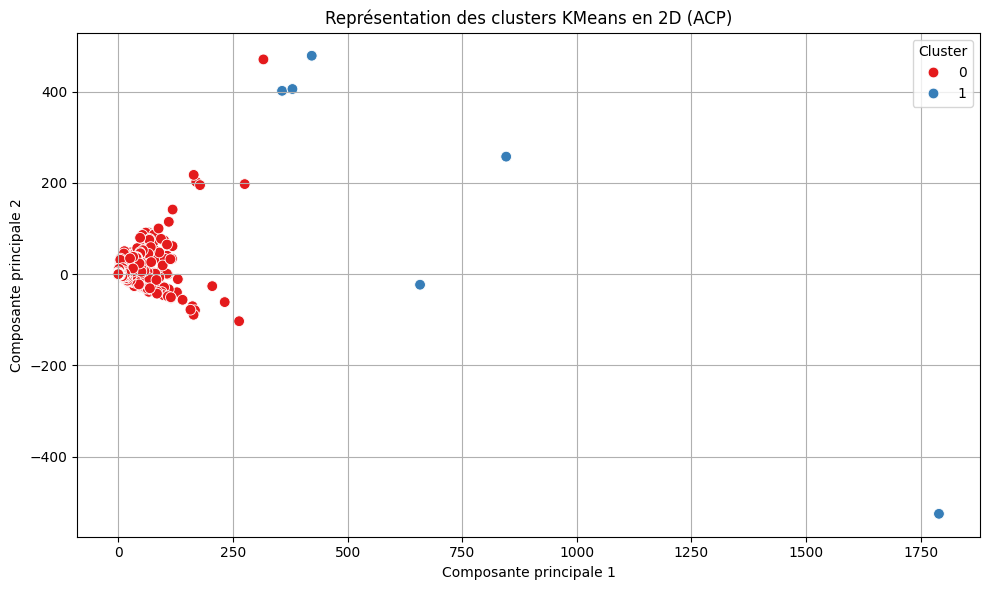

c:\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Helio\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KeyboardInterrupt: 

In [8]:
algoKmeans(2)

### Kmeans = 3

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-9.54344426e-04 -7.02558902e-05 -1.11414557e-03 -5.84779251e-04
  -4.06211785e-06 -5.67531198e-04 -9.33893280e-04 -1.33655789e-03
  -1.08422377e-03  6.81419960e-09 -6.91552399e-05]
 [ 1.97954980e+02  2.59106079e+01  2.55191695e+02  1.88419250e+01
   1.50286560e+00  2.48715370e+01  2.49840467e+02  4.04810208e+02
   3.33544023e+02 -3.37945674e-03  2.54986085e+01]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.30973757e+02  4.33576154e-03 -9.99121516e-03]]

🔹 Inertie (somme des distances intra-cluster) : 14516074.72
Variance expliquée par PC1 et PC2 : [0.41317466 0.11275574]
Somme : 0.525930390696418


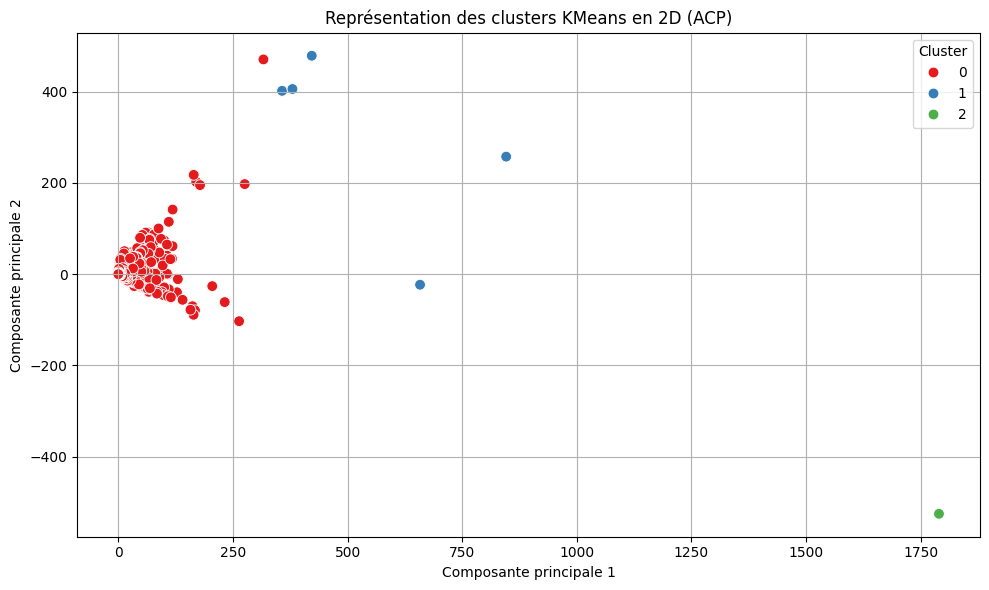

In [ ]:
algoKmeans(3)

In [ ]:
algoKmeans(4)

KeyboardInterrupt: 

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-2.22535035e-02 -8.78236047e-03 -6.25119242e-03 -1.65606178e-02
  -4.47584442e-03 -1.80464541e-02 -1.80601201e-02 -1.48104107e-02
  -1.24342206e-02 -1.77773375e-06 -1.70077918e-03]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.30973757e+02  4.33576154e-03 -9.99121516e-03]
 [ 1.66629361e+02  1.79148750e+02  1.90185511e+02  1.33945229e+01
   1.06515361e+00  5.24226227e+01  2.04847301e+02  3.41491878e+02
   2.59246872e+02 -3.60304431e-03  1.82207874e+01]
 [ 1.09726130e+01  4.19258717e+00  2.64209775e+00  8.26773466e+00
   2.31405419e+00  8.97735722e+00  8.81068913e+00  6.86885684e+00
   5.83178634e+00 -2.84008793e-04  3.45536088e-02]
 [ 2.25640796e-03 -4.10130069e-02 -7.81520157e-02  5.61670113e-03
   1.79872709e-01 -3.03124331e-02 -4.19760302e-03  3.28658527e-02
  -5.8

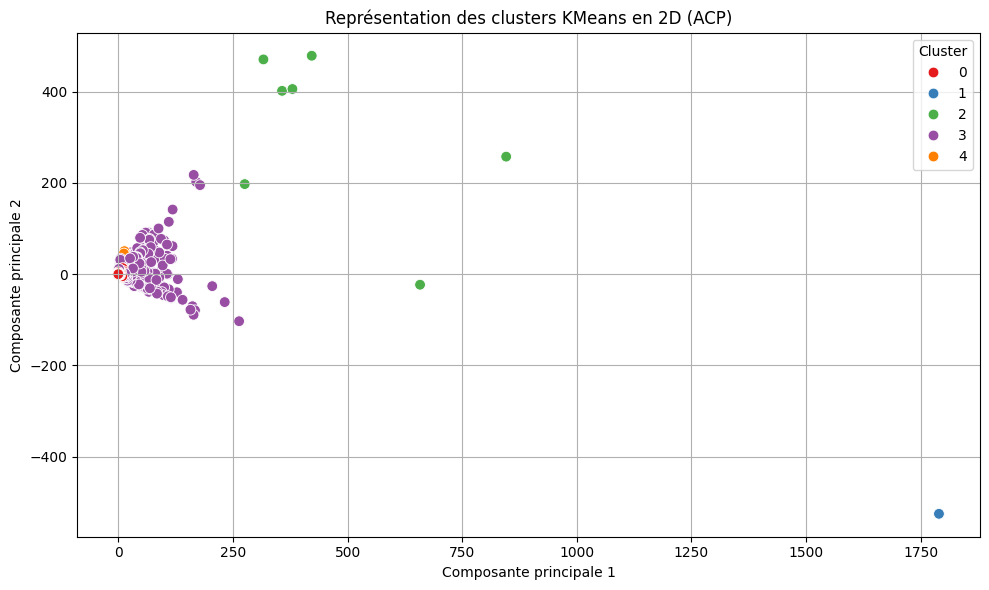

In [ ]:
algoKmeans(5)

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-2.09374584e-02 -8.58555194e-03 -5.94900292e-03 -1.54102063e-02
  -6.06729144e-03 -1.68894593e-02 -1.70245372e-02 -1.42955493e-02
  -1.19817675e-02 -2.91587955e-06 -1.68954084e-03]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.30973757e+02  4.33576154e-03 -9.99121516e-03]
 [ 1.17767716e+01  5.02855696e+00  2.85435195e+00  8.74970777e+00
   4.60608482e-01  9.62592302e+00  9.48321474e+00  7.62154985e+00
   6.39425454e+00  5.20464492e-04  3.32717678e-02]
 [ 9.85143531e-01  7.04188439e-02  3.23424023e-02  2.85885920e-01
   1.11745040e+02  5.70473626e-01  7.72650442e-01  1.17065786e+00
   1.52533508e+00 -6.25456004e-03 -9.52073229e-03]
 [ 1.97954980e+02  2.59106079e+01  2.55191695e+02  1.88419250e+01
   1.50286560e+00  2.48715370e+01  2.49840467e+02  4.04810208e+02
   3.3

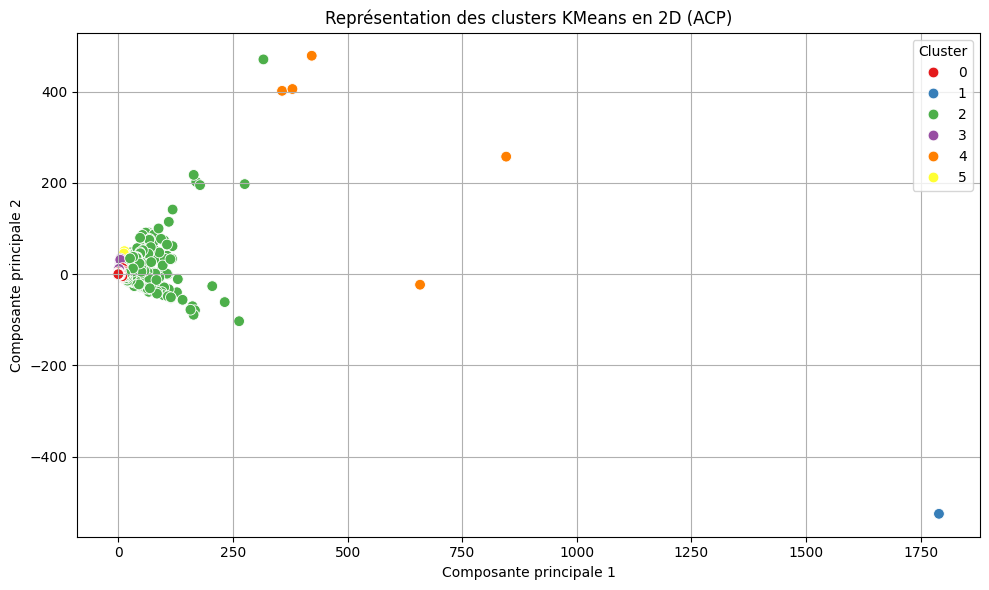

In [ ]:
algoKmeans(6)